<a href="https://colab.research.google.com/github/128040/Python_Final_Project/blob/main/finale_visualisatie_heatmap_scatterplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/My Drive/Colab Notebooks/Python_Project/Python_Data"

import pandas as pd
import matplotlib.pyplot as plt


df_happy = pd.read_csv('Zufriedenheit_Index.csv', delimiter=';')
print(df_happy.head())


Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Python_Project/Python_Data
    Country happy   debt   age education poverty growth labour_hour
0   Belgium   7,6  104,3  41,9      53,1    16,7   -3,5        36,7
1  Bulgaria   5,6   22,6  45,1      33,4    31,8   -2,9        40,2
2   Czechia   7,4   44,2  43,8      36,5    11,0   -3,2        39,8
3   Denmark   7,5   29,8  42,3      52,3    17,0    3,3        34,4
4   Germany   6,5   66,1  45,8      39,3    17,7   -2,5        35,2


In [ ]:
df_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      27 non-null     object
 1   happy        27 non-null     object
 2   debt         27 non-null     object
 3   age          27 non-null     object
 4   education    27 non-null     object
 5   poverty      27 non-null     object
 6   growth       27 non-null     object
 7   labour_hour  27 non-null     object
dtypes: object(8)
memory usage: 1.8+ KB


In [ ]:
df_happy.dtypes

Country        object
happy          object
debt           object
age            object
education      object
poverty        object
growth         object
labour_hour    object
dtype: object

In [ ]:
df_happy_clean = df_happy.copy()

variables_set = ['happy', 'debt', 'age', 'education', 'poverty', 'growth', 'labour_hour']

df_happy_clean[variables_set] = df_happy_clean[variables_set].replace(",", ".", regex=True).astype("float")

print(df_happy_clean)

        Country  happy   debt   age  education  poverty  growth  labour_hour
0       Belgium    7.6  104.3  41.9       53.1     16.7    -3.5         36.7
1      Bulgaria    5.6   22.6  45.1       33.4     31.8    -2.9         40.2
2       Czechia    7.4   44.2  43.8       36.5     11.0    -3.2         39.8
3       Denmark    7.5   29.8  42.3       52.3     17.0     3.3         34.4
4       Germany    6.5   66.1  45.8       39.3     17.7    -2.5         35.2
5       Estonia    7.2   18.5  42.6       45.7     25.5    -1.0         37.8
6       Ireland    7.4   44.4  38.8       61.9     20.2     1.7         36.3
7        Greece    6.7  172.6  46.1       44.8     24.7    -2.4         41.0
8         Spain    7.1  111.6  45.1       49.2     21.7    -4.7         37.7
9        France    7.0  111.8  42.2       49.2     17.2    -4.8         37.2
10      Croatia    6.8   68.2  45.4       34.2     20.2     0.1         39.6
11        Italy    7.2  141.7  48.0       27.4     22.3    -8.0         37.3

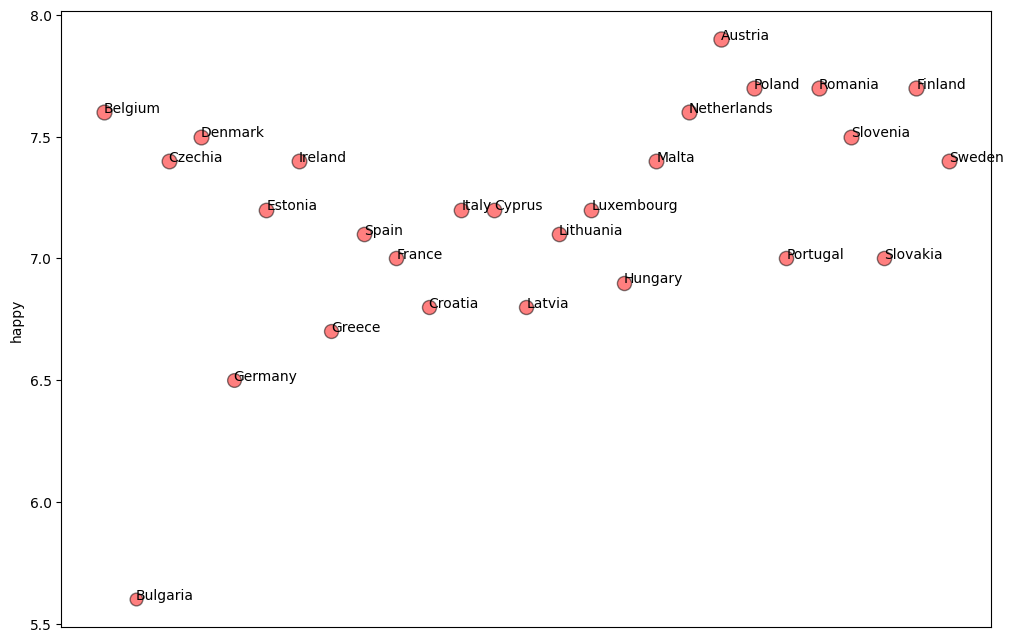

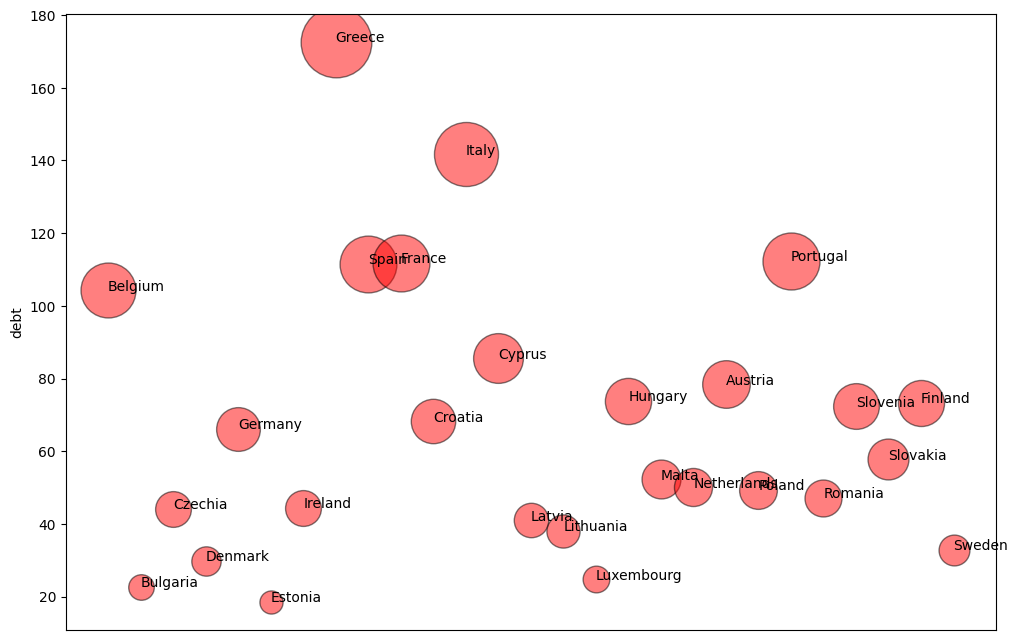

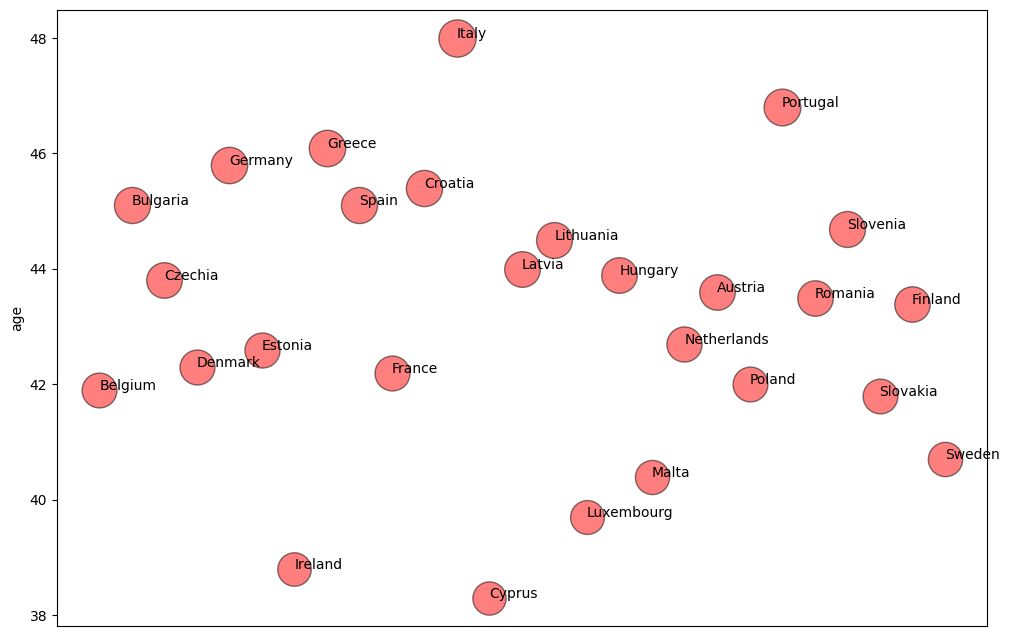

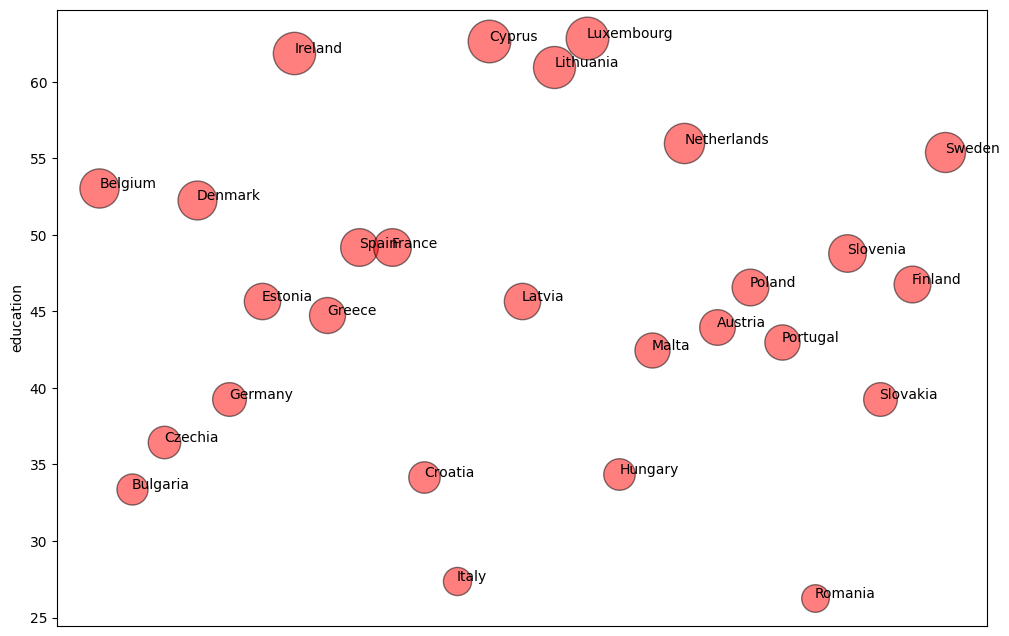

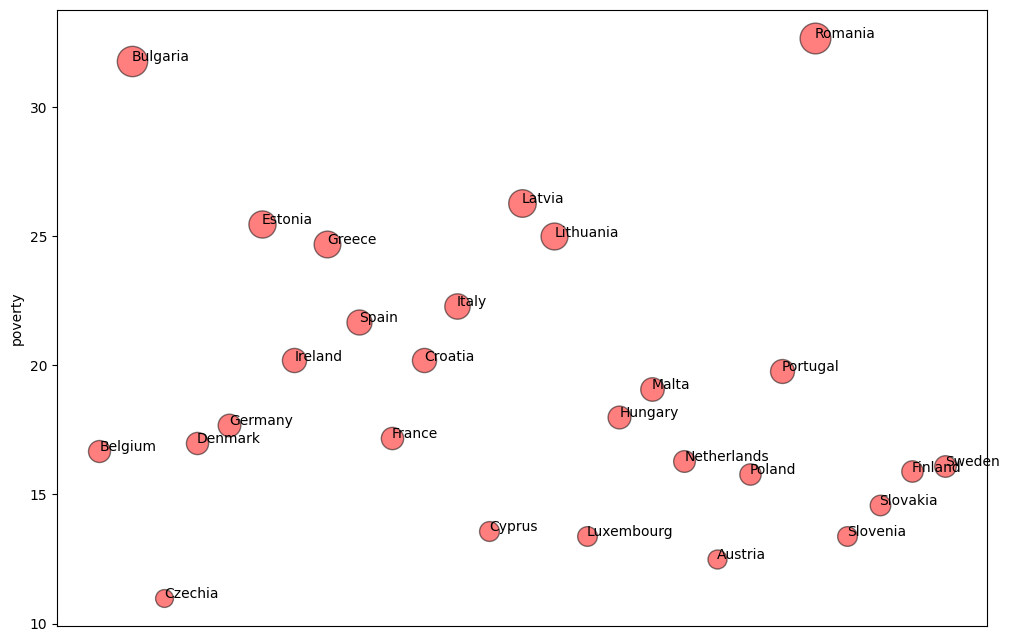

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


ValueError: need at least one array to concatenate

<Figure size 1200x800 with 1 Axes>

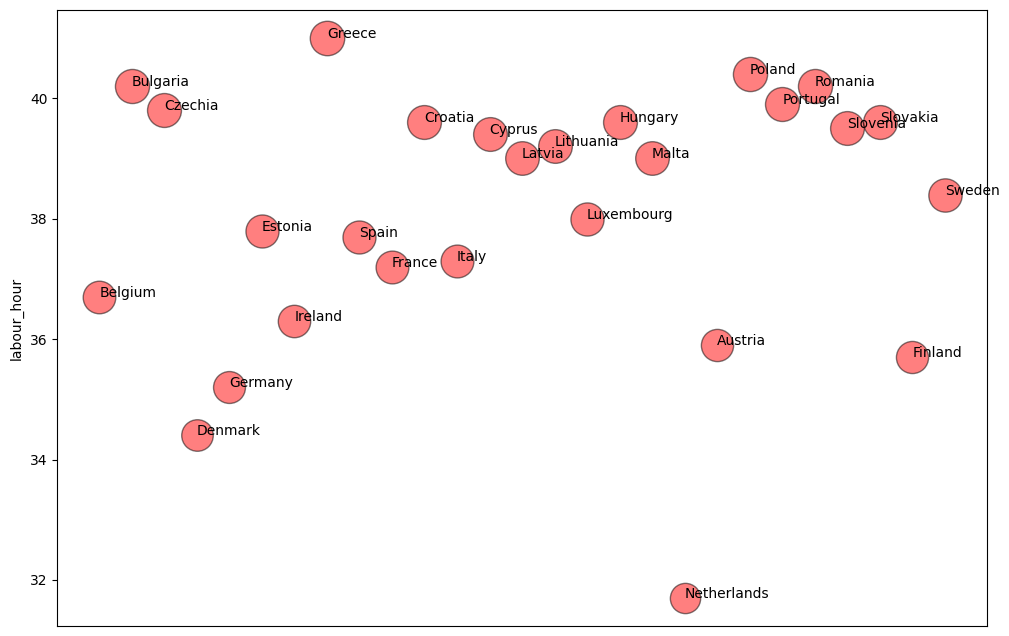

In [ ]:
import matplotlib.pyplot as plt

for variables_set in ('happy', 'debt', 'age', 'education', 'poverty', 'growth', 'labour_hour'):
    # Sortieren der Daten
    df_happy_clean.sort_values(variables_set, inplace=True)

    # Erstellen des Scatterplots
    plt.figure(figsize=(12, 8))
    for i in range(len(df_happy_clean)):
        plt.scatter(df_happy_clean['Country'][i], df_happy_clean[variables_set][i], s=df_happy_clean[variables_set][i]*15, c='r', alpha=0.5, edgecolors='black')
        plt.annotate(df_happy_clean['Country'][i], (df_happy_clean['Country'][i], df_happy_clean[variables_set][i]))
    plt.xticks([])
    plt.ylabel(variables_set)
    plt.show()

In [7]:
print(df_happy_clean[['happy', 'debt', 'age', 'education', 'poverty', 'growth','labour_hour']].corr())

                happy      debt       age  education   poverty    growth  \
happy        1.000000 -0.040503 -0.369287   0.277639 -0.475052  0.061300   
debt        -0.040503  1.000000  0.455854  -0.180955 -0.037242 -0.340456   
age         -0.369287  0.455854  1.000000  -0.634979  0.368169 -0.433397   
education    0.277639 -0.180955 -0.634979   1.000000 -0.376892  0.654244   
poverty     -0.475052 -0.037242  0.368169  -0.376892  1.000000 -0.277995   
growth       0.061300 -0.340456 -0.433397   0.654244 -0.277995  1.000000   
labour_hour -0.334254  0.104133  0.140705  -0.328781  0.291914 -0.275138   

             labour_hour  
happy          -0.334254  
debt            0.104133  
age             0.140705  
education      -0.328781  
poverty         0.291914  
growth         -0.275138  
labour_hour     1.000000  


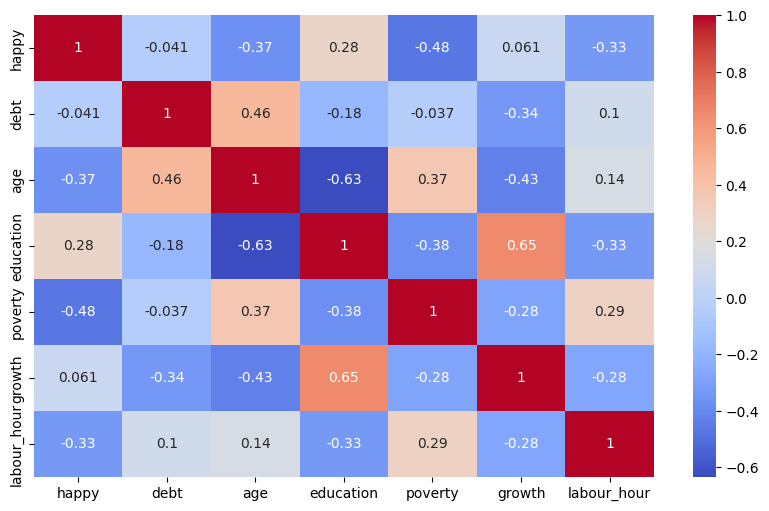

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix (assuming numeric columns)
corr_matrix = df_happy_clean[['happy', 'debt', 'age', 'education', 'poverty', 'growth','labour_hour']].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [9]:
import pandas as pd
import plotly.express as px

# Read the CSV data
df_happy = pd.read_csv('Zufriedenheit_Index.csv', delimiter=';')

# Clean and prepare data (same logic as original code)
df_happy_clean = df_happy.copy()
variables_set = ['happy', 'debt', 'age', 'education', 'poverty', 'growth', 'labour_hour']
df_happy_clean = df_happy_clean[df_happy_clean.columns.tolist()]
df_happy_clean[variables_set] = df_happy_clean[variables_set].replace(",", ".", regex=True).astype("float")

# Create the Plotly scatter plot with text labels
fig = px.scatter(
    df_happy_clean,
    x='happy',
    y='debt',
    size='debt',
    opacity=0.7,
    text='Country',  # Add text for country labels
    hover_name='Country',  # Keep hover text for details
    title='Happiness vs. Debt'
)

# Remove grid lines (optional)
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)

# Update marker appearance (optional)
fig.update_traces(marker=dict(line=dict(color='black', width=1)))  # Add black border around markers

# Show the plot
fig.show()